In [59]:
# Paquetes utilizados en el análisis:
import pandas as pd

In [60]:
# Datos: IIEC
iiec = pd.read_csv('Clapes UC IEC_Coyuntura.csv', parse_dates=True, index_col='Fecha')
iiec.columns = ['iiec']
iiec.head()

,iiec
Fecha,
2007-01-01,53.5
2007-02-01,39.3
2007-03-01,108.1
2007-04-01,53.2
2007-05-01,50.1


In [61]:
# Datos: IPECO
ipeco = pd.read_csv('CEEN UDD IPECO.csv', parse_dates=True, index_col='Mes')
ipeco.columns = ['ipeco']
ipeco.head()

,ipeco
Mes,
2001-12-01,100.00
2002-03-01,102.15
2002-06-01,108.16
2002-09-01,101.68
2002-12-01,100.38


In [62]:
# Datos: ICE
ice = pd.read_csv('CEEN UDD ICE.csv', parse_dates=True, index_col='mes')
ice.columns = ['ice']
ice.head()

,ice
mes,
2003-07-01,8.0
2003-10-01,22.7
2004-01-01,20.8
2004-04-01,9.8
2004-07-01,5.8


In [65]:
# pd.set_option('display.max_rows', None) 
data = pd.concat([iiec, ipeco, ice], axis=1)
data = data.loc['2007-01-01':]
data

,iiec,ipeco,ice
2007-01-01,53.5,131.25,4.8
2007-02-01,39.3,121.73,3.5
2007-03-01,108.1,130.01,11.1
2007-04-01,53.2,135.42,4.4
2007-05-01,50.1,120.60,2.5
...,...,...,...
2020-10-01,269.1,76.31,-5.6
2020-11-01,313.5,79.01,-3.9
2020-12-01,246.3,66.99,5.4
2021-01-01,329.6,70.94,1.7


In [66]:
correlaciones = data.corr()
correlaciones.to_csv('correlaciones.csv')
correlaciones

,iiec,ipeco,ice
iiec,1.000000,-0.723634,-0.484448
ipeco,-0.723634,1.000000,0.608628
ice,-0.484448,0.608628,1.000000


<AxesSubplot:title={'center':'IIEC vs IPECO'}>

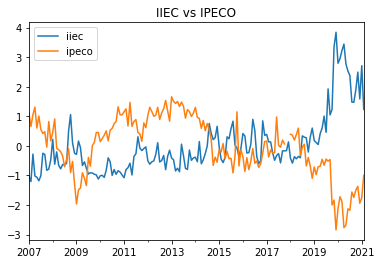

In [67]:
datastd = (data - data.mean()) / data.std()
datastd[['iiec', 'ipeco']].plot(title='IIEC vs IPECO')

<AxesSubplot:title={'center':'IIEC vs ICE'}>

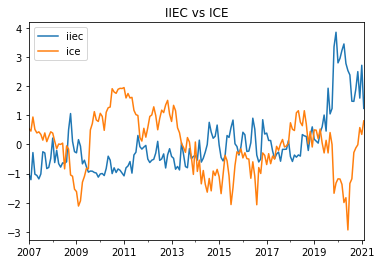

In [68]:
datastd[['iiec', 'ice']].plot(title='IIEC vs ICE')

# Incertidumbre Económica (IIEC) vs Confianza de los Consumidores (IPECO)

In [74]:
l01ipeco = ipeco.shift(1)
l03ipeco = ipeco.shift(3)
l06ipeco = ipeco.shift(6)
l12ipeco = ipeco.shift(12)
f01ipeco = ipeco.shift(-1)
f03ipeco = ipeco.shift(-3)
f06ipeco = ipeco.shift(-6)
f12ipeco = ipeco.shift(-12)
lfipeco = pd.concat([iiec, l12ipeco, l06ipeco, l03ipeco, l01ipeco, ipeco, f01ipeco, f03ipeco, f06ipeco, f12ipeco], axis=1)
lfipeco.columns = ['iiec', 'l12ipeco', 'l06ipeco', 'l03ipeco', 'l01ipeco', 'ipeco', 'f01ipeco', 'f03ipeco', 'f06ipeco', 'f12ipeco']
lfipeco = lfipeco.dropna()
lfipeco

,iiec,l12ipeco,l06ipeco,l03ipeco,l01ipeco,ipeco,f01ipeco,f03ipeco,f06ipeco,f12ipeco
2007-01-01,53.5,136.47,118.76,122.63,136.69,131.25,121.73,135.42,119.61,117.54
2007-02-01,39.3,142.92,124.23,118.16,131.25,121.73,130.01,120.60,116.63,127.05
2007-03-01,108.1,141.50,124.28,136.69,121.73,130.01,135.42,129.09,117.97,106.09
2007-04-01,53.2,141.85,122.63,131.25,130.01,135.42,120.60,119.61,107.00,105.11
2007-05-01,50.1,139.61,118.16,121.73,135.42,120.60,129.09,116.63,125.23,103.76
...,...,...,...,...,...,...,...,...,...,...
2019-10-01,220.0,99.59,93.27,98.49,98.09,65.73,69.16,63.03,49.61,76.31
2019-11-01,376.6,93.52,98.31,96.99,65.73,69.16,47.98,71.65,51.30,79.01
2019-12-01,413.4,84.74,94.05,98.09,69.16,47.98,63.03,68.22,63.02,66.99
2020-01-01,335.7,92.83,98.49,65.73,47.98,63.03,71.65,49.61,61.99,70.94


In [75]:
correlaciones = lfipeco.corr()
correlaciones = correlaciones.drop('iiec')
print(correlaciones['iiec'])
correlaciones['iiec'].to_csv('correlaciones_ipeco.csv')

l12ipeco   -0.182081
l06ipeco   -0.270114
l03ipeco   -0.403477
l01ipeco   -0.568609
ipeco      -0.596019
f01ipeco   -0.615176
f03ipeco   -0.654806
f06ipeco   -0.600682
f12ipeco   -0.459226
Name: iiec, dtype: float64


<AxesSubplot:title={'center':'Correlaciones IIEC vs IPECO'}>

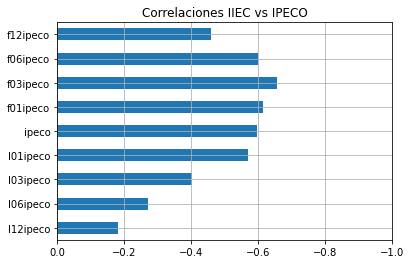

In [76]:
correlaciones['iiec'].plot.barh(title='Correlaciones IIEC vs IPECO', xlim=(0, -1), grid=True)

# Incertidumbre Económica (IIEC) vs Confianza Empresarial (ICE)

In [80]:
l01ice = ice.shift(1)
l03ice = ice.shift(3)
l06ice = ice.shift(6)
l12ice = ice.shift(12)
f01ice = ice.shift(-1)
f03ice = ice.shift(-3)
f06ice = ice.shift(-6)
f12ice = ice.shift(-12)
lfice = pd.concat([iiec, l12ice, l06ice, l03ice, l01ice, ice, f01ice, f03ice, f06ice, f12ice], axis=1)
lfice.columns = ['iiec', 'l12ice', 'l06ice', 'l03ice', 'l01ice', 'ice', 'f01ice', 'f03ice', 'f06ice', 'f12ice']
lfice = lfice.dropna()
lfice

,iiec,l12ice,l06ice,l03ice,l01ice,ice,f01ice,f03ice,f06ice,f12ice
2007-01-01,53.5,11.10,5.5,9.8,0.8,4.8,3.5,4.4,1.7,2.4
2007-02-01,39.3,15.80,4.1,0.6,4.8,3.5,11.1,2.5,-1.4,-2.0
2007-03-01,108.1,16.20,1.0,0.8,3.5,11.1,4.4,3.1,2.5,-6.0
2007-04-01,53.2,13.00,9.8,4.8,11.1,4.4,2.5,1.7,-2.2,-3.5
2007-05-01,50.1,6.40,0.6,3.5,4.4,2.5,3.1,-1.4,0.6,-3.7
...,...,...,...,...,...,...,...,...,...,...
2019-10-01,220.0,-3.40,4.6,-1.5,2.7,-3.8,-30.1,-22.3,-35.1,-5.6
2019-11-01,376.6,3.30,-2.9,-8.3,-3.8,-30.1,-24.6,-22.4,-32.5,-3.9
2019-12-01,413.4,-5.10,-8.3,2.7,-30.1,-24.6,-22.3,-25.3,-49.9,5.4
2020-01-01,335.7,4.16,-1.5,-3.8,-24.6,-22.3,-22.4,-35.1,-24.8,1.7


In [81]:
correlaciones = lfice.corr()
correlaciones = correlaciones.drop('iiec')
print(correlaciones['iiec'])
correlaciones['iiec'].to_csv('correlaciones_ice.csv')

l12ice   -0.037682
l06ice   -0.178629
l03ice   -0.269353
l01ice   -0.385936
ice      -0.451956
f01ice   -0.486727
f03ice   -0.511664
f06ice   -0.530499
f12ice   -0.205258
Name: iiec, dtype: float64


<AxesSubplot:title={'center':'Correlaciones IIEC vs ICE'}>

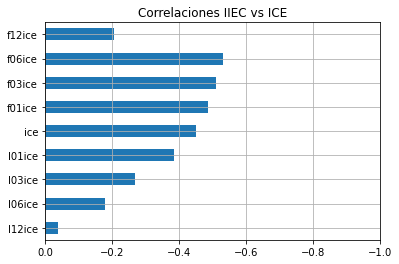

In [82]:
correlaciones['iiec'].plot.barh(title='Correlaciones IIEC vs ICE', xlim=(0, -1), grid=True)